In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
label_encoder = LabelEncoder()

housing_numeric = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_numeric.pkl")
housing_factor = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_factor.pkl")


scaler = StandardScaler()
scaler.fit(housing_numeric)
housing_numeric_scaled = scaler.transform(housing_numeric)
housing_numeric_scaled = pd.DataFrame(housing_numeric_scaled, columns = housing_numeric.columns, index = housing_numeric.index)


housing_combined = pd.concat([housing_numeric_scaled, housing_factor], axis=1)
housing_combined  = housing_combined.drop(['PID', 'SalePrice'], axis=1)


In [102]:
po_ex_ordinal_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5}
none_ex6_ordinal_mapping = {'None': 0, 'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5}
none_fin_ordinal_mapping = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin':3}
none_ex5_ordinal_mapping = {'None': 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4}

housing_combined['ExterQual'] = housing_combined['ExterQual'].map(po_ex_ordinal_mapping)
housing_combined['ExterCond'] = housing_combined['ExterCond'].map(po_ex_ordinal_mapping)
housing_combined['KitchenQual'] = housing_combined['KitchenQual'].map(po_ex_ordinal_mapping)
housing_combined['HeatingQC'] = housing_combined['HeatingQC'].map(po_ex_ordinal_mapping)

housing_combined['BsmtQual'] = housing_combined['BsmtQual'].map(none_ex6_ordinal_mapping)
housing_combined['BsmtCond'] = housing_combined['BsmtCond'].map(none_ex6_ordinal_mapping)
housing_combined['FireplaceQu'] = housing_combined['FireplaceQu'].map(none_ex6_ordinal_mapping)
housing_combined['GarageQual'] = housing_combined['GarageQual'].map(none_ex6_ordinal_mapping)
housing_combined['GarageCond'] = housing_combined['GarageCond'].map(none_ex6_ordinal_mapping)

housing_combined['GarageFinish'] = housing_combined['GarageFinish'].map(none_fin_ordinal_mapping)

housing_combined['PoolQC'] = housing_combined['PoolQC'].map(none_ex5_ordinal_mapping)

housing_combined = pd.get_dummies(housing_combined, drop_first = True)
housing_combined

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NoVeneer,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_NoFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjL

In [110]:
categorical_columns = housing_combined.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(housing_combined[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([housing_combined.reset_index(drop=True), one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NoVeneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,Ga

In [111]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 

SalePrice = housing_numeric['SalePrice']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(alpha=1, tol = 0.1)
lasso.fit(df_encoded, SalePrice)
lasso.score(df_encoded, SalePrice)

0.9211954387181073

In [112]:
cross_val_score_lasso = cross_val_score(lasso, df_encoded, SalePrice, cv=kf)
print(cross_val_score_lasso)
print('Avg Score:',np.mean(cross_val_score_lasso))
print('Variance:',np.var(cross_val_score_lasso))

[0.88988977 0.83793559 0.89507739 0.89255501 0.84147372]
Avg Score: 0.8713862971248275
Variance: 0.0006730944578448368


In [113]:
fold_num=1
scores_list = []
coefficients_list = []
cv_scores = []
coefficients = []
for train_index, test_index in kf.split(df_encoded):
    X_train, X_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    y_train, y_test = SalePrice.iloc[train_index], SalePrice.iloc[test_index]
    lasso.fit(X_train, y_train)
    score = lasso.score(X_test, y_test)
    print(f'Fold {fold_num} score:', score)
    coefficients_list.append({
        'coef': lasso.coef_,
    })
    coefficients.append(lasso.coef_)
    cv_scores.append(score)
    fold_num += 1

coefficients_list

Fold 1 score: 0.8898897727076039
Fold 2 score: 0.8379355932656987
Fold 3 score: 0.895077387493521
Fold 4 score: 0.8925550078766631
Fold 5 score: 0.841473724280651


[{'coef': array([ 4.49425462e+04,  3.47537856e+03,  4.54582487e+03,  1.01676203e+04,
          1.59673096e+04,  4.39858548e+03,  7.37877785e+03,  4.45890895e+03,
         -7.26846744e+03, -9.48480804e+03, -3.50054229e+03,  2.94993715e+03,
          1.29548569e+03,  5.38962992e+03,  3.86845452e+03, -8.73951359e+03,
         -9.18726216e+03,  1.19056954e+03,  6.59661645e+03,  6.59120871e+03,
          2.18081449e+02, -5.77505310e+01, -1.29942647e+03, -3.95430135e+02,
         -7.91707109e+01,  2.94698094e+03, -1.83261420e+03,  8.53921883e+02,
         -3.13395218e+02,  8.63159731e+03, -1.73307789e+02,  6.79268218e+03,
          1.19806794e+03, -4.66241064e+03,  4.92444860e+01, -2.69517019e+04,
         -1.08348569e+04, -1.79357209e+03, -6.04065858e+03,  2.85296103e+03,
          6.30455534e+03,  1.31733786e+04,  1.03236553e+04,  3.43408253e+03,
         -3.55083200e+03,  8.86593497e+03,  5.72720790e+03, -3.50719347e+03,
          2.79746319e+03, -3.96021428e+03, -1.32922556e+04,  8.30142

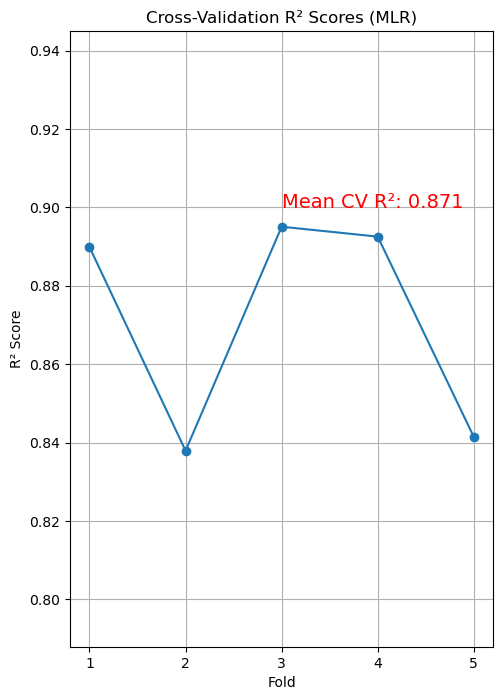

In [114]:
# Plotting the CV scores
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')  # Adjusted x-axis to start from 1
plt.title('Cross-Validation R² Scores (MLR)')
plt.xlabel('Fold')
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel('R² Score')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)
# Annotate mean R² score
mean_r2 = np.mean(cv_scores)
plt.annotate(f'Mean CV R²: {mean_r2:.3f}', xy=(3, .90), color='red', fontsize=14),
plt.show()

In [115]:
lasso.intercept_ 

177156.4232042264

In [116]:
lasso.feature_names_in_

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'YrSold', 'GarageYrBlt', 'MoSold',
       'YearBuilt', 'YearRemodAdd', 'CentralAir', 'PavedDrive',
       'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_I (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'LotSh

In [117]:
pd.set_option('display.max_rows', 500)
coef_series = pd.Series(
  data=lasso.coef_,
  index=lasso.feature_names_in_
)

coef_series.sort_values(ascending = False)

Neighborhood_GrnHill       104961.744605
RoofMatl_Membran            93114.955261
KitchenQual_Po              67568.447869
Condition2_PosA             54526.828795
GrLivArea                   46819.068339
RoofMatl_WdShngl            46195.287482
OverallQual_10              44550.932988
RoofMatl_Metal              44232.927356
Neighborhood_StoneBr        38605.948636
SaleType_Con                36814.339887
Exterior1st_PreCast         29526.109907
OverallQual_9               27610.705181
MiscFeature_Othr            26701.784049
Neighborhood_Greens         25363.588341
PoolQC_Gd                   25200.439048
Foundation_Stone            25064.848921
PoolQC_Fa                   24728.437798
LandContour_HLS             21599.429272
Neighborhood_BrDale         19973.742028
Neighborhood_Blueste        18910.294597
BsmtFinSF1                  17272.966790
OverallCond_9               16401.850253
Foundation_Slab             16238.653640
Exterior1st_BrkFace         14927.483660
BsmtFinType2_GLQ

In [118]:
lasso = Lasso(alpha=1, tol=0.1)
fold_num=1
best_params_list = []
best_scores_list = []
coefficients_list = []
param_grid = {
    'alpha': np.linspace(1, 200)
}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kf, scoring='r2', n_jobs = -1,  return_train_score=True)
grid_search.fit(df_encoded, SalePrice)
print('Best Estimator: ',grid_search.best_estimator_)
print('Best Params: ',grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
# Store best parameters and score
best_params_list.append({
    'params':grid_search.best_params_,
    # 'fold': fold_num,
    })
best_score = grid_search.best_score_
best_scores_list.append({
    'score':best_score,
    # 'fold':fold_num
    })
# Store coefficients of the best model
best_model = grid_search.best_estimator_
coefficients_list.append({
    'coef': best_model.coef_,
    # 'fold':fold_num
    })
print('Best Params List:', best_params_list)
print('Best Scores List:',best_scores_list)

Best Estimator:  Lasso(alpha=33.48979591836735)
Best Params:  {'alpha': 33.48979591836735}
Best Score:  0.9106072665191001
Best Params List: [{'params': {'alpha': 33.48979591836735}}]
Best Scores List: [{'score': 0.9106072665191001}]
